### Theoretical 

1. What is K-Nearest Neighbors (KNN) and how does it work
    * K-Nearest Neighbors (KNN) is a simple, non-parametric, and lazy learning algorithm used for classification and regression.
        * Storing all training data points.
        * When making a prediction, it finds the K nearest data points (neighbors) to the query point using a distance metric
        * For classification, it assigns the most common class among the neighbors.
        * For regression, it averages the values of the neighbors.

2. What is the difference between KNN Classification and KNN Regression
    * KNN Classification: Assigns the class label based on the majority vote of the K nearest neighbors.
    * KNN Regression: Predicts a continuous value by averaging (or taking a weighted average of) the values of the K nearest neighbors.

3. What is the role of the distance metric in KNN
    * The distance metric determines how "closeness" between points is measured. Common distance metrics include

4. What is the Curse of Dimensionality in KNN
    - Data points become more spread out, making distance-based comparison less meaningful.
    - The nearest neighbors become less distinguishable.
    - Computational cost increases due to higher space complexity.
    
5. How can we choose the best value of K in KNN
    - Use cross-validation to test different values of K.
    * A small K (e.g., 1) may lead to overfitting (high variance).
    * A large K may cause underfitting (high bias).
    * A common heuristic is to set 𝐾=squer𝑁(where N is the number of training samples).

6. What are KD Tree and Ball Tree in KNN
   * KD Tree (K-Dimensional Tree): A binary space-partitioning tree that recursively splits data points along feature axes.
   * Ball Tree: Organizes data into nested hyperspheres, making it more efficient for high-dimensional data.

7. When should you use KD Tree vs. Ball Tree
   * KD Tree is efficient for low-dimensional data (typically < 30 dimensions).
   * Ball Tree performs better for higher-dimensional data.
   * If dimensionality is too high (> 50), brute-force search may be the best option.
  
8. What are the disadvantages of KNN
   * Computational Cost: Slow for large datasets since it stores and searches the entire dataset.
   * Memory Intensive: Requires storing all training data.
   * Sensitive to Irrelevant Features: Feature selection is crucial.
   * Affected by the Curse of Dimensionality: Performance deteriorates with high dimensions.

9. How does feature scaling affect KNN
   * KNN is distance-based, so features with different scales can distort the results. Feature scaling (e.g., Min-Max Scaling or Standardization) ensures that all features contribute equally to the distance calculations.

10. What is PCA (Principal Component Analysis)
   * PCA is a dimensionality reduction technique
       * ransforms data into a new coordinate system where features are uncorrelated.
       * Selects the principal components (new features) that retain the most variance.
       * Helps with high-dimensional data, reducing the impact of the curse of dimensionality.

11. How does PCA work
   * Standardize the Data: Normalize the features to have zero mean and unit variance.
   * Compute the Covariance Matrix: Measures how features vary together.
   * Compute Eigenvalues and Eigenvectors: Identify the directions (principal components) where variance is maximized.
   * Select Principal Components: Choose the top k components based on explained variance.
   * Transform Data: Project the original data onto the new k-dimensional space.

12. What is the geometric intuition behind PCA
   * The first principal component is the direction with the maximum variance.
   * Each subsequent component is orthogonal (perpendicular) to the previous ones and captures the next highest variance.
   * It effectively rotates and scales the data to align along the most significant variance directions.

13. What is the difference between Feature Selection and Feature Extraction
   * Feature Selection: Selects a subset of existing features (e.g., removing less important ones).
   * Feature Extraction: Creates new features by transforming existing ones (e.g., PCA generates new principal components).

14. What are Eigenvalues and Eigenvectors in PCA
   * Eigenvectors: Represent the directions (principal components) of maximum variance in the data.
   * Eigenvalues: Indicate the magnitude of variance captured by each eigenvector.

15. How do you decide the number of components to keep in PCA
   * Explained Variance Ratio: Choose components that retain at least 95% of the variance.
   * Scree Plot: Look for the "elbow" point where additional components add little variance.
   * Cross-validation: Test different numbers of components and evaluate model performance.

16. Can PCA be used for classification
   * PCA itself is not a classification algorithm, but it can improve classification models by:
       * Reducing dimensionality to prevent overfitting.
       * Removing noise and redundant features.
       * Speeding up computation in high-dimensional datasets.

17. What are the limitations of PCA
   * Loss of Interpretability: The transformed features (principal components) lack direct meaning.
   * Assumes Linearity: PCA assumes data variance is captured well by linear projections.
   * Sensitive to Scaling: Requires feature standardization.
   * Not Ideal for Classification: Since it ignores class labels, PCA may not always improve classification tasks.

18. How do KNN and PCA complement each other
   * PCA reduces dimensionality, mitigating the curse of dimensionality in KNN.
   * KNN benefits from PCA because distance calculations become more meaningful in lower dimensions.
   * PCA removes noise, improving KNN's accuracy and efficiency.

19. How does KNN handle missing values in a dataset
   * Imputation using KNN: Fill missing values based on the nearest neighbors' values.
   * Remove missing data: If the missing percentage is low.
   * Use mean/median imputation: For numerical features.

20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?
    * PCA
        - Purpose Dimensionality reduction	
        - Considers Class Labels No
        - Objective	Maximizes variance in data
        - Best for General dimensionality reduction

    * LDA
        - Purpose Classification & Dimensionality reduction
        - Considers Class Labels Yes
        - Objective	Maximizes class separability
        - Best for Classification tasks

### Practical

In [116]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_regression, make_classification 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [117]:
# 21. Train a KNN Classifier on the Iris dataset and print model accuracy

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Classifier Accuracy: {accuracy:.4f}')

KNN Classifier Accuracy: 1.0000


In [118]:
# 22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'KNN Regressor MSE: {mse:.4f}')

KNN Regressor MSE: 275.9503


In [119]:
# 23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Train the classifiers
knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)

# Make predictions
y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)

# Evaluate the accuracy of each classifier
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"Accuracy using Euclidean distance: {accuracy_euclidean:.4f}")
print(f"Accuracy using Manhattan distance: {accuracy_manhattan:.4f}")

Accuracy using Euclidean distance: 1.0000
Accuracy using Manhattan distance: 1.0000


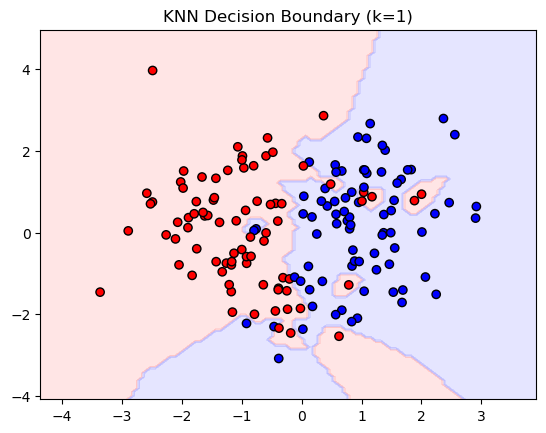

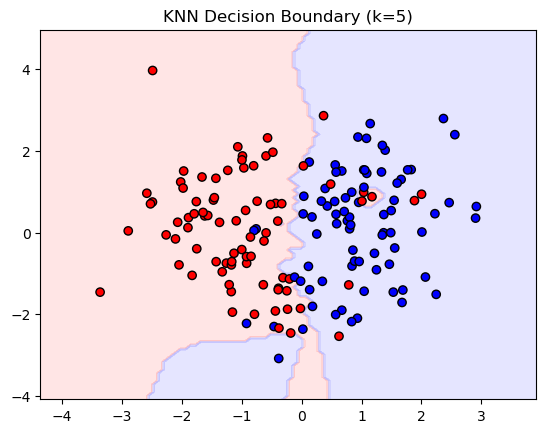

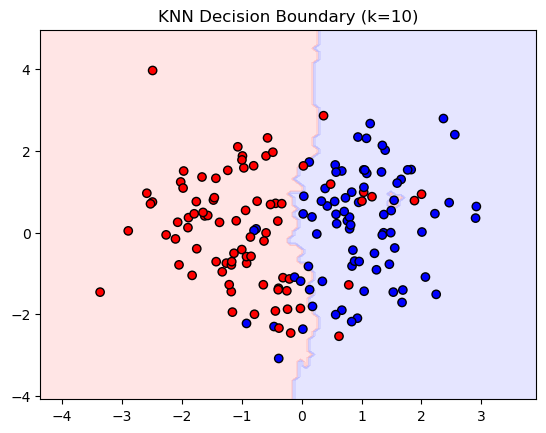

In [120]:
# 24. Train a KNN Classifier with different values of K and visualize decision boundaried 

X, y = make_classification(n_samples=200, n_features=2, n_informative=2,  n_redundant=0, n_repeated=0, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_decision_boundary(X, y, model, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.title(title)
    plt.show()
    
k_values = [1, 5, 10]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundary(X_train, y_train, knn, f'KNN Decision Boundary (k={k})')

In [121]:
# 25. Apply Feature Scaling before training a KNN model and compare results with unscaled data

knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
unscaled_accuracy = accuracy_score(y_test, y_pred_unscaled)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN with feature scaling
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
scaled_accuracy = accuracy_score(y_test, y_pred_scaled)

# Print accuracy comparison
print(f'Accuracy without Scaling: {unscaled_accuracy:.2f}')
print(f'Accuracy with Scaling: {scaled_accuracy:.2f}')


Accuracy without Scaling: 0.80
Accuracy with Scaling: 0.80


In [122]:
# 26. Train a PCA model on synthetic data and print the explained variance ratio for each component

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


print("Explained variance ratio for each component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f'Component {i+1}: {ratio:.4f}')


Explained variance ratio for each component:
Component 1: 0.5445
Component 2: 0.4555


In [123]:
# 27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)

print(f'Accuracy without PCA: {accuracy_no_pca:.2f}')
print(f'Accuracy with PCA: {accuracy_with_pca:.2f}')


Accuracy without PCA: 0.80
Accuracy with PCA: 0.80


In [124]:
# 28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


best_knn.fit(X_train_pca, y_train)
y_pred_pca = best_knn.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)

print(f'Best Parameters: {best_params}')
print(f'Best Accuracy without PCA: {best_accuracy:.2f}')
print(f'Accuracy with PCA: {accuracy_with_pca:.2f}')


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5}
Best Accuracy without PCA: 0.80
Accuracy with PCA: 0.80


In [125]:
# 29. Train a KNN Classifier and check the number of misclassified samples

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

pca = PCA()
pca.fit(X_train_scaled)

misclassified_samples = np.sum(y_pred != y_test)
print(f'Number of misclassified samples: {misclassified_samples}')


Number of misclassified samples: 8


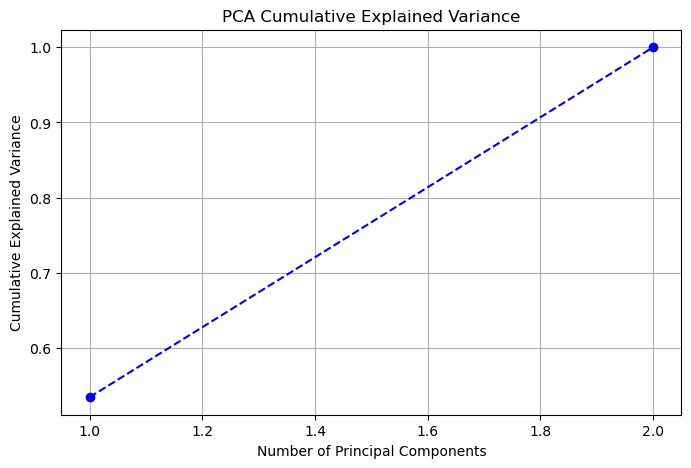

In [126]:
# 30. Train a PCA model and visualize the cumulative explained variance.

pca = PCA()
pca.fit(X_train_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid()
plt.show()

In [127]:
# 31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_uniform = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn_uniform.fit(X_train, y_train)
knn_distance.fit(X_train, y_train)

y_pred_uniform = knn_uniform.predict(X_test)
y_pred_distance = knn_distance.predict(X_test)

accuracy_uniform = accuracy_score(y_test, y_pred_uniform)
accuracy_distance = accuracy_score(y_test, y_pred_distance)

print(f"Accuracy with 'uniform' weights: {accuracy_uniform:.4f}")
print(f"Accuracy with 'distance' weights: {accuracy_distance:.4f}")

Accuracy with 'uniform' weights: 1.0000
Accuracy with 'distance' weights: 1.0000


In [128]:
# 32. Train a KNN Regressor and analyze the effect of different K values on performance
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

for k, mse in zip(k_values, mse_values):
    print(f"K = {k}: MSE = {mse:.4f}")

K = 1: MSE = 0.0000
K = 3: MSE = 0.0074
K = 5: MSE = 0.0116
K = 7: MSE = 0.0122
K = 9: MSE = 0.0104
K = 11: MSE = 0.0127
K = 13: MSE = 0.0128
K = 15: MSE = 0.0178


In [129]:
# 33. Implement KNN Imputation for handling missing values in a dataset

data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [5, np.nan, 7, 8, 9],
    'C': [9, 10, 11, np.nan, 13]
}

df = pd.DataFrame(data)
print("Original Dataset with Missing Values:")
print(df)

imputer = KNNImputer(n_neighbors=2)  

df_imputed = imputer.fit_transform(df)


df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print("\nDataset After KNN Imputation:")
print(df_imputed)

Original Dataset with Missing Values:
     A    B     C
0  1.0  5.0   9.0
1  2.0  NaN  10.0
2  NaN  7.0  11.0
3  4.0  8.0   NaN
4  5.0  9.0  13.0

Dataset After KNN Imputation:
     A    B     C
0  1.0  5.0   9.0
1  2.0  6.0  10.0
2  3.0  7.0  11.0
3  4.0  8.0  12.0
4  5.0  9.0  13.0


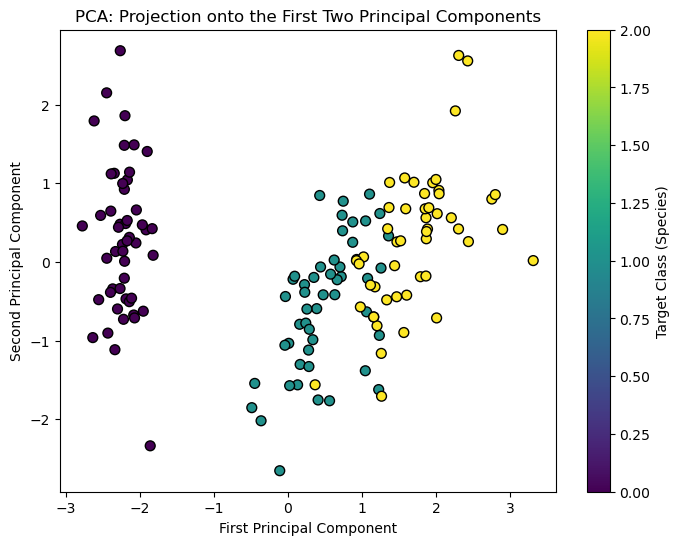

In [130]:
# 34. Train a PCA model and visualize the data projection onto the first two principal components

data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label='Target Class (Species)')
plt.title('PCA: Projection onto the First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [131]:
# 35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

knn_kd_tree = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_ball_tree = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')

knn_kd_tree.fit(X_train, y_train)
knn_ball_tree.fit(X_train, y_train)

y_pred_kd_tree = knn_kd_tree.predict(X_test)
y_pred_ball_tree = knn_ball_tree.predict(X_test)

accuracy_kd_tree = accuracy_score(y_test, y_pred_kd_tree)
accuracy_ball_tree = accuracy_score(y_test, y_pred_ball_tree)

print(f"Accuracy using KD Tree: {accuracy_kd_tree:.4f}")
print(f"Accuracy using Ball Tree: {accuracy_ball_tree:.4f}")

Accuracy using KD Tree: 1.0000
Accuracy using Ball Tree: 1.0000


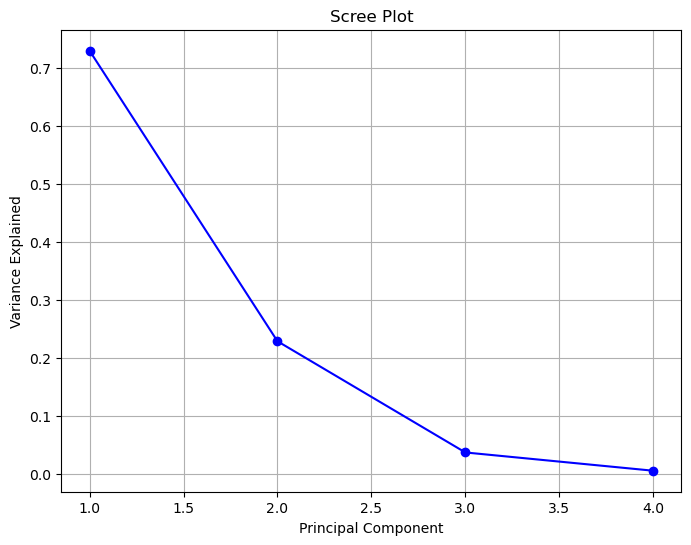

In [132]:
# 36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

In [133]:
# 37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [134]:
# 38. Train a PCA model and analyze the effect of different numbers of components on accuracy

accuracies = []

for n_components in range(1, X.shape[1] + 1):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Train the KNN model
    knn.fit(X_train_pca, y_train)
    
    # Make predictions and evaluate accuracy
    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

for n, acc in zip(range(1, X.shape[1] + 1), accuracies):
    print(f'Accuracy with {n} PCA components: {acc:.4f}')

Accuracy with 1 PCA components: 0.9333
Accuracy with 2 PCA components: 1.0000
Accuracy with 3 PCA components: 1.0000
Accuracy with 4 PCA components: 1.0000


In [135]:
# 39. Train a KNN Classifier with different leaf_size values and compare accuracy

leaf_sizes = [10, 20, 30, 40, 50]

accuracies = []

for leaf_size in leaf_sizes:

    knn = KNeighborsClassifier(n_neighbors=3, leaf_size=leaf_size)
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

for leaf_size, acc in zip(leaf_sizes, accuracies):
    print(f'Accuracy with leaf_size {leaf_size}: {acc:.4f}')

Accuracy with leaf_size 10: 1.0000
Accuracy with leaf_size 20: 1.0000
Accuracy with leaf_size 30: 1.0000
Accuracy with leaf_size 40: 1.0000
Accuracy with leaf_size 50: 1.0000


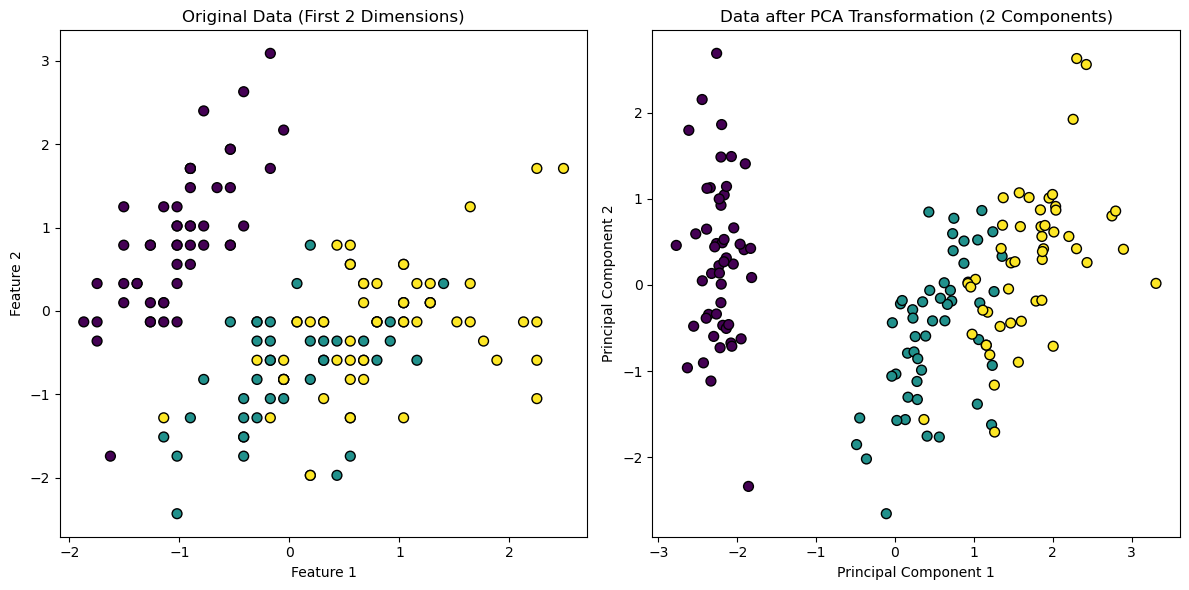

In [136]:
# 40. Train a PCA model and visualize how data points are transformed before and after PC

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
ax1.set_title('Original Data (First 2 Dimensions)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
ax2.set_title('Data after PCA Transformation (2 Components)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [137]:
# 41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

from sklearn.datasets import load_wine
data = load_wine()

x , y = data.data , data.target

x_train , x_test , y_train , y_test = train_test_split(x  , y , test_size = 0.2  , random_state= 1 )

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train , y_train)

y_pred = knn.predict(x_test)

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



In [141]:
# 42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error

distance_metrics = ['euclidean', 'manhattan', 'minkowski']

for metric in distance_metrics:
    knn_reg = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_reg.fit(X_train, y_train)
    y_pred_reg = knn_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_reg)
    print(f"Mean Squared Error using {metric} distance: {mse:.4f}")



Mean Squared Error using euclidean distance: 0.0311
Mean Squared Error using manhattan distance: 0.0311
Mean Squared Error using minkowski distance: 0.0311


In [142]:
# 43. Train a KNN Classifier and evaluate using ROC-AUC score

from sklearn.metrics import  mean_squared_error, roc_auc_score
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

y_pred_clf = knn_clf.predict(X_test)
y_prob_clf = knn_clf.predict_proba(X_test)

print(classification_report(y_test, y_pred_clf))


roc_auc = roc_auc_score(label_binarize(y_test, classes=np.unique(y)), y_prob_clf, multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.4f}")

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

ROC-AUC Score: 0.9995


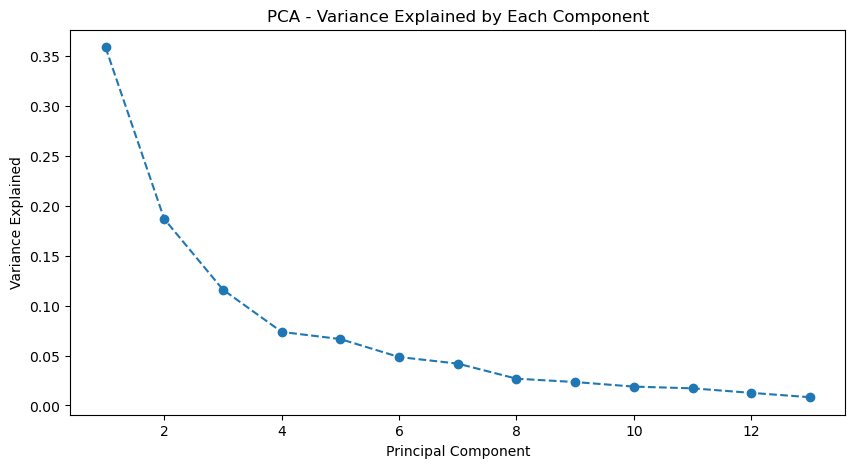

In [143]:
# 44. Train a PCA model and visualize the variance captured by each principal component

pca = PCA()
X_pca = pca.fit_transform(X_train)

# Plot explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA - Variance Explained by Each Component')
plt.show()

In [144]:
# 45. Train a KNN Classifier and perform feature selection before training

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

y_pred_clf = knn_clf.predict(X_test)
y_prob_clf = knn_clf.predict_proba(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_clf))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



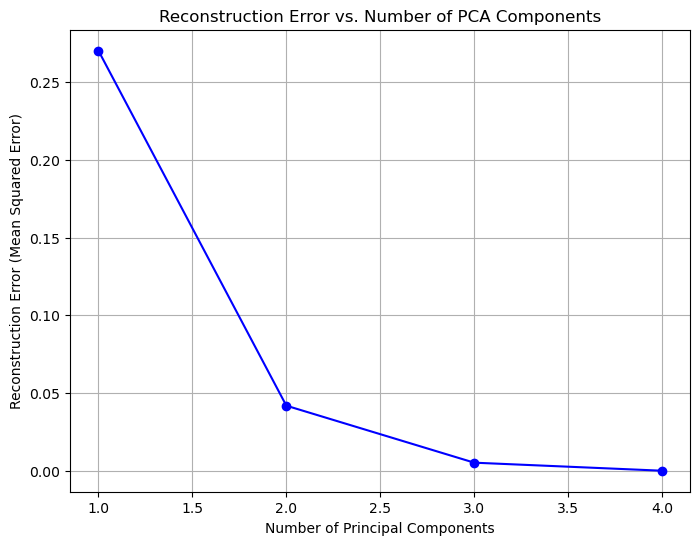

In [145]:
# 46. Train a PCA model and visualize the data reconstruction error after reducing dimensions

components_range = range(1, X_scaled.shape[1] + 1)  
reconstruction_errors = []

for n_components in components_range:
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X_scaled)

    X_reconstructed = pca.inverse_transform(X_reduced)

    error = np.mean((X_scaled - X_reconstructed) ** 2)
    reconstruction_errors.append(error)

plt.figure(figsize=(8, 6))
plt.plot(components_range, reconstruction_errors, marker='o', linestyle='-', color='b')
plt.title("Reconstruction Error vs. Number of PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Reconstruction Error (Mean Squared Error)")
plt.grid(True)
plt.show()

C:\Users\kisha\AppData\Local\Temp\ipykernel_9072\908820202.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label="Test data")


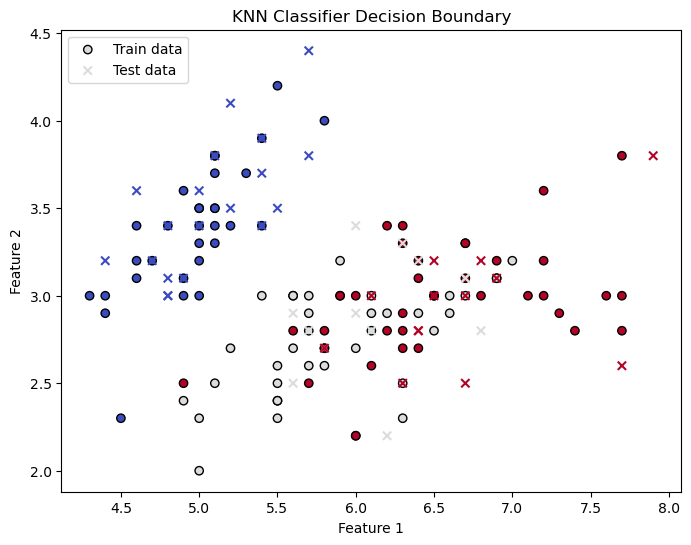

In [146]:
# 47. Train a KNN Classifier and visualize the decision boundary

iris = load_iris()
X = iris.data[:, :2] 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

plt.figure(figsize=(8, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm, marker='o', label="Train data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label="Test data")

plt.title("KNN Classifier Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="upper left")
plt.show()

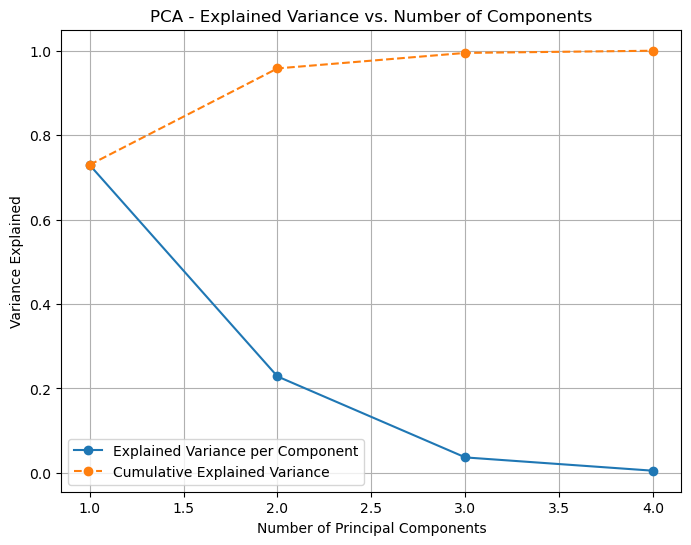

In [147]:
# 48. Train a PCA model and analyze the effect of different numbers of components on data variance

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label="Explained Variance per Component")
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label="Cumulative Explained Variance")

# Add labels and title
plt.title("PCA - Explained Variance vs. Number of Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance Explained")
plt.legend()
plt.grid(True)
plt.show()